In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("seeds_dataset.txt", delimiter='\t', header=None)

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
0    210 non-null float64
1    210 non-null float64
2    210 non-null float64
3    210 non-null float64
4    210 non-null float64
5    210 non-null float64
6    210 non-null float64
7    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [5]:
corr_matrix = dataset.corr()
corr_matrix[7].sort_values(ascending=False)

7    1.000000
5    0.577273
6    0.024301
3   -0.257269
1   -0.327900
0   -0.346058
4   -0.423463
2   -0.531007
Name: 7, dtype: float64

In [6]:
X = dataset.iloc[:, [5, 6, 2]].values
y = dataset.iloc[:, -1].values

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly_features.fit_transform(X)

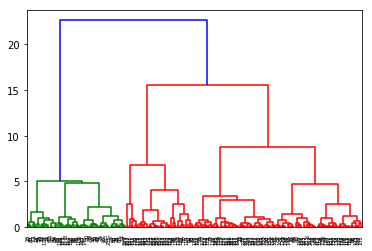

In [8]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X_poly, method='ward'))
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = ac.fit_predict(X_poly)

No handles with labels found to put in legend.


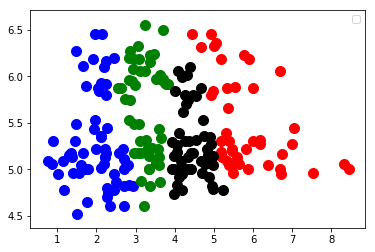

In [10]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='black')
plt.legend()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [13]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(random_state=42)

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"solver": ["svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"], "fit_intercept": [False, True]}
]

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=42, solver='auto',
        tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 'fit_intercept': [False, True]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [15]:
print("Best parameters: {0}".format(grid_search.best_params_))
print("Best Accuracy: {0:.0f}%".format(100*grid_search.best_score_))

Best parameters: {'fit_intercept': True, 'solver': 'svd'}
Best Accuracy: 91%


In [16]:
ridge = RidgeClassifier(fit_intercept=True, solver="svd")

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(ridge, X_train, y_train)

In [18]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_train_pred, y_train))

0.5563486402641868

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_pred, y_train)

array([[51,  2,  6],
       [ 2, 54,  0],
       [ 6,  0, 47]])

In [22]:
from sklearn.metrics import f1_score

f1_score(y_train_pred, y_train, average='macro')

0.90516164892564